# Assignment 20 Solutions

##### 1. What is the underlying concept of Support Vector Machines ?

SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems and work well for many practical problems. The idea of SVM is simple: The algorithm creates a line or a hyperplane which separates the data into classes.

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine. Consider the below diagram in which there are two different categories that are classified using a decision boundary or hyperplane

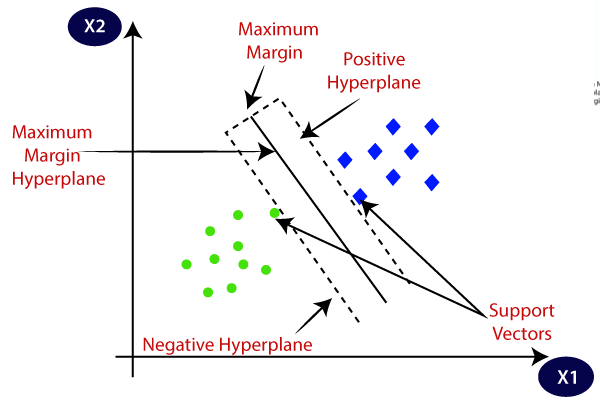

##### 2. What is the concept of a support vector ?

Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane. These are the points that help us build our SVM.

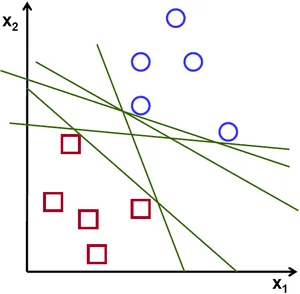

![j8xIA4k3gXUDCFU.png](j8xIA4k3gXUDCFU.png)

![jcA4Ls8kBYSM5nza.png](jcA4Ls8kBYSM5nza.png)

In [1]:
#from IPython import display
#display.Image("jEWNXTAao7phK-5.png")
#display.Image("j8xIA4k3gXUDCFU.png")

##### 3. When using SVMs, why is it necessary to scale the inputs ?

Because Support Vector Machine (SVM) optimization occurs by minimizing the decision vector w, the optimal hyperplane is influenced by the scale of the input features and it’s therefore recommended that data be standardized (mean 0, var 1) prior to SVM model training. 

The below 6 plots show the fitted SVM hyperplanes and (+1,-1) margins for various values of penalty coefficient C. The top three plots show the fitted hyperplane for non-standardized features, while the bottom three plots show the fitted hyperplane for standardized features.


![Yaiw1o17Iymb_9mFY_j5Yw.png](Yaiw1o17Iymb_9mFY_j5Yw.png)


##### 4. When an SVM classifier classifies a case, can it output a confidence score? What about a percentage chance ? 

An SVM classifier can give the distance between the test instance and the decision boundary as output, so we can use that as a confidence score, but we cannot use this score to directly converted it into class probabilities.

We need to use “predict_proba” function. This method computes the probability that a given datapoint belongs to a particular class using Platt scaling.

P(class/input) = 1 / (1 + exp(A * f(input) + B))

Here, P(class/input) is the probability that “input” belongs to “class” and f(input) is the signed distance of the input datapoint from the boundary, which is basically the output of “decision_function”. We need to train the SVM as usual and then optimize the parameters A and B. The value of P(class/input) will always be between 0 and 1. Bear in mind that the training method would be slightly different if we want to use Platt scaling. We need to train a probability model on top of our SVM. Also, to avoid overfitting, it uses n-fold cross validation. So this is a lot more expensive than training a non-probabilistic SVM (like we did earlier). Let’s see how to do it:

    classifier_conf = SVC(kernel='linear', probability=True) 
    classifier_conf.fit(X, y) 
    classifier_conf.predict_proba([1, 3]) array([[ 0.67902586, 0.32097414]])

It is 67.9% sure that this point belongs to class 0 and 32.1% sure that it belongs to class 1. 

##### 5. Should you train a model on a training set with millions of instances and hundreds of features using the primal or dual form of the SVM problem ?

This question applies only to linear SVMs since kernelized can only use the dual form. The computational complexity of the primal form of the SVM problem is proportional to the number of training instances m, while the computational complexity of the dual form is proportional to a number between m² and m³. So, if there are millions of instances, you should use the primal form, because the dual form will be much too slow.

##### 6. Let's say you've used an RBF kernel to train an SVM classifier, but it appears to underfit the training collection. Is it better to raise or lower (gamma)? What about the letter C ?

The RBF kernel on two samples x and x’, represented as feature vectors in some input space, is defined as

![RjKNCngZPHvDtkws.png](RjKNCngZPHvDtkws.jpg)

||x-x’||² recognized as the squared Euclidean distance between the two feature vectors. sigma is a free parameter.

The gamma parameter in SVM tuning signifies the influence of points either near or far away from the hyperplane. 

For a low gamma, the model will be too constrained and include all points of the training dataset without really capturing the shape.

For a higher gamma, the model will capture the shape of the dataset well.


The cost parameter decides how much an SVM should be allowed to “bend” with the data. For a low cost, you aim for a smooth decision surface, and for a higher cost, you aim to classify more points correctly. It is also simply referred to as the cost of misclassification.

If C is Low: The classifier can maximize the margin between most of the points while misclassifying a few points because the penalty is so low.
Larger values of C allow for more complex decision boundaries, which can lead to overfitting, while smaller values of C may result in underfitting.

 **Increasing gamma and Increasing C**

##### 7. To solve the soft margin linear SVM classifier problem with an off-the-shelf QP solver, how should the QP parameters (H, f, A, and b) be set ?

##### 8. On a linearly separable dataset, train a LinearSVC. Then, using the same dataset, train an SVC and an SGDClassifier. See if you can get them to make a model that is similar to yours ?

In [2]:
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [3]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C = 5
alpha = 0.05

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42).fit(X_scaled, y)
svc_clf = SVC(kernel="linear", C=C).fit(X_scaled, y)
sgd_clf = SGDClassifier(alpha=alpha, random_state=42).fit(X_scaled, y)


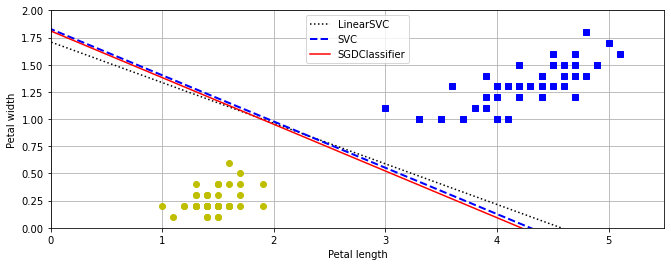

In [4]:
import matplotlib.pyplot as plt
def compute_decision_boundary(model):
    w = -model.coef_[0, 0] / model.coef_[0, 1]
    b = -model.intercept_[0] / model.coef_[0, 1]
    return scaler.inverse_transform([[-10, -10 * w + b], [10, 10 * w + b]])

lin_line = compute_decision_boundary(lin_clf)
svc_line = compute_decision_boundary(svc_clf)
sgd_line = compute_decision_boundary(sgd_clf)

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(lin_line[:, 0], lin_line[:, 1], "k:", label="LinearSVC")
plt.plot(svc_line[:, 0], svc_line[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(sgd_line[:, 0], sgd_line[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper center")
plt.axis([0, 5.5, 0, 2])
plt.grid()

plt.show()

**Close Enough**

##### 9. On the MNIST dataset, train an SVM classifier. You'll need to use one-versus-the-rest to assign all 10 digits because SVM classifiers are binary classifiers. To accelerate up the process, you might want to tune the hyperparameters using small validation sets. What level of precision can you achieve ?

In [6]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

mnist = load_digits()

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train = X[:1397]
y_train = y[:1397]
X_test = X[1397:]
y_test = y[1397:]

X_train.shape, X_test.shape

lin_clf = LinearSVC()
lin_clf.fit(X_train, y_train)

y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

C:\Users\lenovo\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9971367215461704

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [8]:
lin_clf = LinearSVC(max_iter=1000,dual=False,random_state=42)
lin_clf.fit(X_train_scaled, y_train)

LinearSVC(dual=False, random_state=42)

In [9]:
y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.8174659985683608

In [13]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(lin_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ...............................C=1.4976512150105938; total time=   0.2s
[CV] END ...............................C=1.4976512150105938; total time=   0.1s
[CV] END ...............................C=1.4976512150105938; total time=   0.0s


C:\Users\lenovo\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ...............................C=10.278944329397513; total time=   0.6s


C:\Users\lenovo\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ...............................C=10.278944329397513; total time=   0.5s
[CV] END ...............................C=10.278944329397513; total time=   0.3s
[CV] END ................................C=2.618693433336463; total time=   0.3s
[CV] END ................................C=2.618693433336463; total time=   0.1s
[CV] END ................................C=2.618693433336463; total time=   0.1s


C:\Users\lenovo\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ................................C=9.060574948127972; total time=   0.6s


C:\Users\lenovo\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ................................C=9.060574948127972; total time=   0.5s


C:\Users\lenovo\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ................................C=9.060574948127972; total time=   0.3s


C:\Users\lenovo\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ...............................C=4.1302917249853115; total time=   0.5s
[CV] END ...............................C=4.1302917249853115; total time=   0.3s
[CV] END ...............................C=4.1302917249853115; total time=   0.2s


C:\Users\lenovo\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ................................C=7.251949141640454; total time=   0.7s


C:\Users\lenovo\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ................................C=7.251949141640454; total time=   0.4s
[CV] END ................................C=7.251949141640454; total time=   0.2s
[CV] END ...............................C=1.1746008231358798; total time=   0.1s
[CV] END ...............................C=1.1746008231358798; total time=   0.1s
[CV] END ...............................C=1.1746008231358798; total time=   0.0s


C:\Users\lenovo\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ................................C=4.414066288486048; total time=   0.5s


C:\Users\lenovo\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ................................C=4.414066288486048; total time=   0.3s
[CV] END ................................C=4.414066288486048; total time=   0.1s


C:\Users\lenovo\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ................................C=8.491780506745055; total time=   0.7s


C:\Users\lenovo\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ................................C=8.491780506745055; total time=   0.5s


C:\Users\lenovo\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ................................C=8.491780506745055; total time=   0.3s


C:\Users\lenovo\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ................................C=4.958837306368879; total time=   0.5s


C:\Users\lenovo\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ................................C=4.958837306368879; total time=   0.3s
[CV] END ................................C=4.958837306368879; total time=   0.2s


RandomizedSearchCV(cv=3, estimator=LinearSVC(dual=False, random_state=42),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021E36FB9BB0>},
                   verbose=2)

In [14]:
rnd_search_cv.best_estimator_

LinearSVC(C=1.1746008231358798, dual=False, random_state=42)

In [15]:
rnd_search_cv.best_score_

0.8770027512542483

In [16]:
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)

LinearSVC(C=1.1746008231358798, dual=False, random_state=42)

In [17]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9985683607730852

In [18]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.885

##### 10. On the California housing dataset, train an SVM regressor ?

In [29]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
from sklearn.svm import LinearSVR

lin_svr = LinearSVR(random_state=42)
lin_svr.fit(X_train_scaled, y_train)

C:\Users\lenovo\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR(random_state=42)

In [33]:
from sklearn.metrics import mean_squared_error

y_pred = lin_svr.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
mse

0.9641780189948642

In [34]:
np.sqrt(mse)

0.9819256687727764

In [35]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(SVR(), param_distributions, n_iter=10, verbose=2, cv=3, random_state=42)
rnd_search_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=  13.2s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=  12.8s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=  12.6s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=  11.9s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=  12.2s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=  12.5s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=  12.8s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=  12.4s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=  12.3s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787431; total time=  12.1s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787431; total time=  11.9s
[CV] END ....C=1.5808361216819946, gamma=0.05399

RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021E36CCB550>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021E36CC55E0>},
                   random_state=42, verbose=2)

In [36]:
rnd_search_cv.best_estimator_

SVR(C=4.745401188473625, gamma=0.07969454818643928)

In [37]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
np.sqrt(mse)

0.5727524770785369

In [38]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

0.5929168385528745